In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime

#dataset = pd.read_csv('../../../datasets/dependency.csv')
dataset = pd.read_csv('./LSTM.csv')
dataset.head(20)

,timestamp,kube-proxy-fq5mr,istiod-587bbdc654-kxkq9,omsagent-rs-7546994bcb-wgxnv,kube-proxy-6k99q,reviews-v3-cc56b578-hvbrt,kubernetes-dashboard-7f7d6bbd7f-2p5nh,reviews-v2-6cb6ccd848-7pkwg,optimization-algorithm-8595878648-j47fn,omsagent-sq6c5,...,ingress-nginx-controller-5947756d78-fl295,reviews-v1-7f6558b974-8r46j,metrics-server-5f4c878d8-lxljm,tunnelfront-857f5c9f68-rwpfk,omsagent-gbb6z,coredns-869cb84759-qvxlc,kube-proxy-kq4c6,k8-server-5654d89694-grp4t,istio-tracing-8584b4d7f9-bdhz5,coredns-autoscaler-5b867494f-qchnt
0,1600976192,0.003711,0.005830,0.019772,0.004393,0.018448,0.000935,0.019201,0.000897,0.015866,...,0.003820,0.012437,0.004248,0.157617,0.023635,0.010773,0.003678,0.002906,0.009609,0.000658
1,1600973492,0.004059,0.006244,0.019370,0.004475,0.023797,0.001436,0.024501,0.003309,0.016592,...,0.003959,0.014784,0.004246,0.153782,0.021020,0.010598,0.003535,NaN,0.008083,0.000673
2,1600973792,0.003930,0.005741,0.019305,0.004065,0.026368,0.001409,0.026129,0.001471,0.016520,...,0.003791,0.014844,0.004276,0.159030,0.021508,0.010851,0.003795,NaN,0.009161,0.000630
3,1600974992,0.003949,0.006417,0.019329,0.004313,0.022146,0.001509,0.021971,0.000856,0.016119,...,0.003889,0.014204,0.004157,0.160483,0.021709,0.010529,0.004031,NaN,0.009992,0.000709
4,1600976492,0.003699,0.005982,0.019438,0.004036,0.019533,0.001050,0.020632,0.000913,0.016843,...,0.003908,0.013654,0.004342,0.156565,0.022638,0.010635,0.003533,0.003296,0.010012,0.000735
5,1600976792,0.003711,0.006467,0.018860,0.004109,0.017855,0.001197,0.017511,0.000987,0.016554,...,0.003929,0.013022,0.004427,0.158181,0.023028,0.011025,0.003682,0.001131,0.010134,0.000667
6,1600977092,0.003874,0.006243,0.018349,0.004202,0.016765,0.001468,0.017244,0.000899,0.016445,...,0.003914,0.011422,0.004224,0.158309,0.023385,0.011570,0.003555,0.001218,0.010330,0.000686
7,1600975292,0.004336,0.006244,0.019729,0.004697,0.019907,0.001397,0.020151,0.000924,0.016119,...,0.004021,0.013930,0.004303,0.154309,0.023706,0.010906,0.004205,0.021134,0.015717,0.000703
8,1600974692,0.004121,0.005721,0.018679,0.004289,0.018394,0.001506,0.020084,0.000902,0.015945,...,0.003913,0.013031,0.004326,0.158810,0.022463,0.010445,0.003465,NaN,0.008786,0.000668
9,1600975592,0.003890,0.005586,0.018709,0.004260,0.023762,0.001526,0.024624,0.000951,0.016498,...,0.003833,0.014473,0.004242,0.156726,0.022967,0.011168,0.003625,0.007401,0.083325,0.000686


In [2]:
dataset['timestamp'] = dataset['timestamp'].floordiv(1000)
dataset.tail()

,timestamp,kube-proxy-fq5mr,istiod-587bbdc654-kxkq9,omsagent-rs-7546994bcb-wgxnv,kube-proxy-6k99q,reviews-v3-cc56b578-hvbrt,kubernetes-dashboard-7f7d6bbd7f-2p5nh,reviews-v2-6cb6ccd848-7pkwg,optimization-algorithm-8595878648-j47fn,omsagent-sq6c5,...,ingress-nginx-controller-5947756d78-fl295,reviews-v1-7f6558b974-8r46j,metrics-server-5f4c878d8-lxljm,tunnelfront-857f5c9f68-rwpfk,omsagent-gbb6z,coredns-869cb84759-qvxlc,kube-proxy-kq4c6,k8-server-5654d89694-grp4t,istio-tracing-8584b4d7f9-bdhz5,coredns-autoscaler-5b867494f-qchnt
49,1600989,0.003630,0.005898,0.018784,0.004142,0.012602,0.001445,0.012866,0.000868,0.016338,...,0.003893,0.009813,0.004333,0.152231,0.022204,0.011281,0.003468,0.002795,0.010981,0.000664
50,1600989,0.003660,0.006386,0.019384,0.004110,0.012973,0.001484,0.013016,0.000919,0.015795,...,0.003886,0.009728,0.004137,0.156659,0.022084,0.010804,0.003607,0.000921,0.010958,0.000689
51,1600987,0.004036,0.006600,0.019328,0.004462,0.012944,0.001531,0.013005,0.000978,0.016302,...,0.003924,0.009977,0.004368,0.156520,0.023994,0.010938,0.003922,0.000876,0.017480,0.000728
52,1600987,0.003758,0.006408,0.019662,0.004440,0.012790,0.001392,0.011960,0.000913,0.016057,...,0.003949,0.010253,0.004222,0.157533,0.022878,0.010889,0.003596,0.000938,0.095341,0.000674
53,1600988,0.003893,0.005990,0.019194,0.004334,0.012541,0.001434,0.012204,0.000958,0.015837,...,0.003813,0.009649,0.004197,0.155999,0.021559,0.011210,0.003469,0.000778,0.089248,0.000696


In [3]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],unit='s')
dataset=dataset.set_index('timestamp')
dataset.head()

,kube-proxy-fq5mr,istiod-587bbdc654-kxkq9,omsagent-rs-7546994bcb-wgxnv,kube-proxy-6k99q,reviews-v3-cc56b578-hvbrt,kubernetes-dashboard-7f7d6bbd7f-2p5nh,reviews-v2-6cb6ccd848-7pkwg,optimization-algorithm-8595878648-j47fn,omsagent-sq6c5,prometheus-5db67458fb-f7vz9,...,ingress-nginx-controller-5947756d78-fl295,reviews-v1-7f6558b974-8r46j,metrics-server-5f4c878d8-lxljm,tunnelfront-857f5c9f68-rwpfk,omsagent-gbb6z,coredns-869cb84759-qvxlc,kube-proxy-kq4c6,k8-server-5654d89694-grp4t,istio-tracing-8584b4d7f9-bdhz5,coredns-autoscaler-5b867494f-qchnt
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-01-19 12:42:56,0.003711,0.005830,0.019772,0.004393,0.018448,0.000935,0.019201,0.000897,0.015866,0.037793,...,0.003820,0.012437,0.004248,0.157617,0.023635,0.010773,0.003678,0.002906,0.009609,0.000658
1970-01-19 12:42:53,0.004059,0.006244,0.019370,0.004475,0.023797,0.001436,0.024501,0.003309,0.016592,0.037427,...,0.003959,0.014784,0.004246,0.153782,0.021020,0.010598,0.003535,NaN,0.008083,0.000673
1970-01-19 12:42:53,0.003930,0.005741,0.019305,0.004065,0.026368,0.001409,0.026129,0.001471,0.016520,0.037524,...,0.003791,0.014844,0.004276,0.159030,0.021508,0.010851,0.003795,NaN,0.009161,0.000630
1970-01-19 12:42:54,0.003949,0.006417,0.019329,0.004313,0.022146,0.001509,0.021971,0.000856,0.016119,0.038780,...,0.003889,0.014204,0.004157,0.160483,0.021709,0.010529,0.004031,NaN,0.009992,0.000709
1970-01-19 12:42:56,0.003699,0.005982,0.019438,0.004036,0.019533,0.001050,0.020632,0.000913,0.016843,0.038577,...,0.003908,0.013654,0.004342,0.156565,0.022638,0.010635,0.003533,0.003296,0.010012,0.000735


In [5]:
#remove column containg only 0 values
dataset = dataset.loc[:, (dataset != 0).any(axis=0)]

In [46]:
#dataset.drop(columns=[
#   'reviews-ratings',
#   'productpage-details',
#   'productpage-reviews', 
#] , inplace=True)

In [6]:
dataset

,kube-proxy-fq5mr,istiod-587bbdc654-kxkq9,omsagent-rs-7546994bcb-wgxnv,kube-proxy-6k99q,reviews-v3-cc56b578-hvbrt,kubernetes-dashboard-7f7d6bbd7f-2p5nh,reviews-v2-6cb6ccd848-7pkwg,optimization-algorithm-8595878648-j47fn,omsagent-sq6c5,prometheus-5db67458fb-f7vz9,...,ingress-nginx-controller-5947756d78-fl295,reviews-v1-7f6558b974-8r46j,metrics-server-5f4c878d8-lxljm,tunnelfront-857f5c9f68-rwpfk,omsagent-gbb6z,coredns-869cb84759-qvxlc,kube-proxy-kq4c6,k8-server-5654d89694-grp4t,istio-tracing-8584b4d7f9-bdhz5,coredns-autoscaler-5b867494f-qchnt
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-01-19 12:42:56,0.003711,0.005830,0.019772,0.004393,0.018448,0.000935,0.019201,0.000897,0.015866,0.037793,...,0.003820,0.012437,0.004248,0.157617,0.023635,0.010773,0.003678,0.002906,0.009609,0.000658
1970-01-19 12:42:53,0.004059,0.006244,0.019370,0.004475,0.023797,0.001436,0.024501,0.003309,0.016592,0.037427,...,0.003959,0.014784,0.004246,0.153782,0.021020,0.010598,0.003535,NaN,0.008083,0.000673
1970-01-19 12:42:53,0.003930,0.005741,0.019305,0.004065,0.026368,0.001409,0.026129,0.001471,0.016520,0.037524,...,0.003791,0.014844,0.004276,0.159030,0.021508,0.010851,0.003795,NaN,0.009161,0.000630
1970-01-19 12:42:54,0.003949,0.006417,0.019329,0.004313,0.022146,0.001509,0.021971,0.000856,0.016119,0.038780,...,0.003889,0.014204,0.004157,0.160483,0.021709,0.010529,0.004031,NaN,0.009992,0.000709
1970-01-19 12:42:56,0.003699,0.005982,0.019438,0.004036,0.019533,0.001050,0.020632,0.000913,0.016843,0.038577,...,0.003908,0.013654,0.004342,0.156565,0.022638,0.010635,0.003533,0.003296,0.010012,0.000735
1970-01-19 12:42:56,0.003711,0.006467,0.018860,0.004109,0.017855,0.001197,0.017511,0.000987,0.016554,0.037269,...,0.003929,0.013022,0.004427,0.158181,0.023028,0.011025,0.003682,0.001131,0.010134,0.000667
1970-01-19 12:42:57,0.003874,0.006243,0.018349,0.004202,0.016765,0.001468,0.017244,0.000899,0.016445,0.037309,...,0.003914,0.011422,0.004224,0.158309,0.023385,0.011570,0.003555,0.001218,0.010330,0.000686
1970-01-19 12:42:55,0.004336,0.006244,0.019729,0.004697,0.019907,0.001397,0.020151,0.000924,0.016119,0.038644,...,0.004021,0.013930,0.004303,0.154309,0.023706,0.010906,0.004205,0.021134,0.015717,0.000703
1970-01-19 12:42:54,0.004121,0.005721,0.018679,0.004289,0.018394,0.001506,0.020084,0.000902,0.015945,0.036692,...,0.003913,0.013031,0.004326,0.158810,0.022463,0.010445,0.003465,NaN,0.008786,0.000668


In [48]:
#########################################################################################################################

In [7]:
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
import random
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tools.eval_measures import rmse
import os
from keras import backend as K

2022-05-26 09:34:40.042089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 09:34:40.042114: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
seed_value= 42
os.environ['PYTHONHASHSEED']=str(seed_value)

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

2022-05-26 09:34:52.233760: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-26 09:34:52.236008: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-26 09:34:52.236030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (RPVM): /proc/driver/nvidia/version does not exist


In [9]:
from keras.callbacks import EarlyStopping

In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [12]:
def split_train_test(split_size,dataset):
    split_size = split_size
    train_size = int(len(dataset) * split_size)
    test_size = len(dataset) - train_size
    train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
    return train,test

In [13]:
def create_time_series_generator(y_train,y_test,time_steps,batch_size=1):
    train_generator = TimeseriesGenerator(y_train, y_train, length=time_steps, batch_size=1)     
    test_generator = TimeseriesGenerator(y_test, y_test, length=time_steps, batch_size=1)
    return train_generator,test_generator

In [14]:
def plot_graph(y_test,predictions):
    plt.plot(y_test, marker='.', label="true")
    plt.plot(predictions,  marker='.', label="prediction")
    plt.ylabel('Value')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

In [21]:
def create_LSTM_model(time_steps):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
      units=32, 
      activation='relu',
      input_shape=(time_steps,1)
    ))
    model.add(keras.layers.Dense(units=16))
    model.add(keras.layers.Dense(units=2))
    model.add(keras.layers.Dense(units=1))
    model.compile(
      loss='mean_squared_error',
      optimizer=tf.keras.optimizers.Adam(0.001),
      metrics=['mae','mse']
    )
    return model

In [22]:
def get_y_from_generator(gen):
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [23]:
def predict(num_prediction, model,dataset,time_steps):
    prediction_list = dataset[-time_steps:]
    for _ in range(num_prediction):
        x = prediction_list[-time_steps:]
        x = x.reshape((1, time_steps, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[time_steps-1:]
        
    return prediction_list

In [24]:
link_prediction_list = []
mape_prediction_error = []
rmse_prediction_error = []
smape_prediction_error = []

In [25]:
from sklearn.preprocessing import MinMaxScaler
def cal_weights(split_size,time_steps,batch_size,epochs,dataset,prediction_steps,is_scaled=True):
    early_stopping_callback = EarlyStopping(monitor='loss', patience=10)
    dataset_copy=dataset.copy()
    
    for col in dataset.columns:
        print('=================== LINK ============>',col)
        nodelink = col
        feature_needed = [nodelink]
        train,test=split_train_test(split_size,dataset)
        y_train = train[nodelink].values.reshape((-1,1))
        y_test = test[nodelink].values.reshape((-1,1))
        
        # Feature Scaling
        if is_scaled:
            sc = MinMaxScaler(feature_range = (-1000, 1000))
            y_train_set_scaled = sc.fit_transform(y_train)
            y_test_set_scaled = sc.fit_transform(y_test)
            train_generator,test_generator = create_time_series_generator(y_train_set_scaled,y_test_set_scaled,time_steps,batch_size)
        else:
            train_generator,test_generator = create_time_series_generator(y_train,y_test,time_steps,batch_size)
        
        model=create_LSTM_model(time_steps)
        history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])
        
        predictions = model.predict_generator(test_generator)
        
        if is_scaled:
            predicted_rescaled = sc.inverse_transform(predictions)
            test_eval=get_y_from_generator(test_generator)
            test_eval_rescaled = sc.inverse_transform(test_eval)
            plot_graph(test_eval_rescaled,predicted_rescaled)
            error = mean_absolute_percentage_error(test_eval_rescaled,predicted_rescaled)
            pred_actual_rmse = rmse(test_eval_rescaled,predicted_rescaled)
            smape_error=smape(test_eval_rescaled,predicted_rescaled)
        else:
            test_eval=get_y_from_generator(test_generator)
            plot_graph(test_eval,predictions)
            error = mean_absolute_percentage_error(test_eval,predictions)
            pred_actual_rmse = rmse(test_eval,predictions)
            smape_error=smape(test_eval,predictions)
              
        df=dataset_copy[-time_steps:] #from -1
        val=df[feature_needed]
        
        if is_scaled:
            scaled_data_to_predict=sc.fit_transform(val.values.reshape((-1,1)))
            list_val = predict(prediction_steps,model,scaled_data_to_predict,time_steps)
            vals=list_val.reshape((-1,1))
            inverse_preds =sc.inverse_transform(vals)
            inverse_preds = inverse_preds.reshape((-1))
            link_prediction_list.append({"predictions":inverse_preds[1:]})
        else:
            list_val = predict(prediction_steps,model,val.values.reshape((-1)),time_steps)
            link_prediction_list.append({"predictions":list_val[1:]})
        
        mape_prediction_error.append(error)
        rmse_prediction_error.append(pred_actual_rmse[0])
        smape_prediction_error.append(smape_error)   

=================== LINK ============> kube-proxy-fq5mr
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 457139.7188 - mae: 609.3290 - mse: 457139.7188
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 380743.7812 - mae: 547.6646 - mse: 380743.7812
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 322889.1562 - mae: 496.5759 - mse: 322889.1562
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 273825.5625 - mae: 437.4936 - mse: 273825.5625
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 242035.5938 - mae: 397.1591 - mse: 242035.5938
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 227615.2812 - mae: 376.8021 - mse: 227615.2812
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 227787.0312 - mae: 374.3239 - mse: 227787.0312
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 228648.6719 - mae: 379.6033 - mse: 228648.6719
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


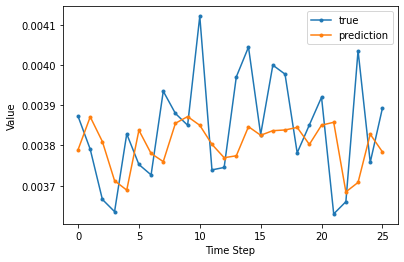

=================== LINK ============> istiod-587bbdc654-kxkq9
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 298695.7812 - mae: 448.1281 - mse: 298695.7812
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 297129.9375 - mae: 446.4081 - mse: 297129.9375
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 296797.9688 - mae: 445.7049 - mse: 296797.9688
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 296582.5312 - mae: 445.4064 - mse: 296582.5312
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 295301.8750 - mae: 444.4607 - mse: 295301.8750
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 295251.9688 - mae: 443.9071 - mse: 295251.9688
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 294436.6875 - mae: 442.6586 - mse: 294436.6875
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 293457.3125 - mae: 441.9146 - mse: 293457.3125
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


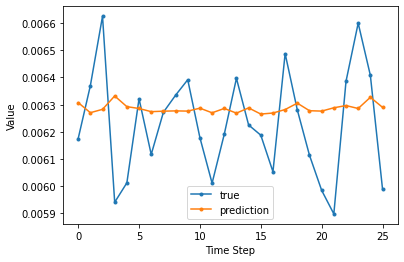

=================== LINK ============> omsagent-rs-7546994bcb-wgxnv
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 239857.6094 - mae: 361.3506 - mse: 239857.6094
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 235941.0312 - mae: 356.3289 - mse: 235941.0312
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 232207.3281 - mae: 356.8286 - mse: 232207.3281
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 230129.6719 - mae: 360.3031 - mse: 230129.6719
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 227543.7500 - mae: 358.7301 - mse: 227543.7500
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 227035.4375 - mae: 358.6606 - mse: 227035.4375
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 226294.4375 - mae: 357.9795 - mse: 226294.4375
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 225235.3281 - mae: 356.6253 - mse: 225235.3281
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


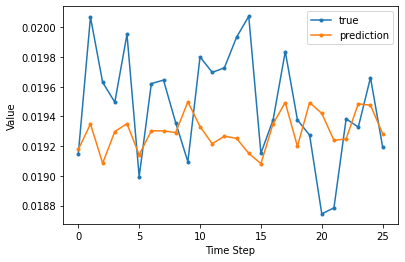

=================== LINK ============> kube-proxy-6k99q
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 245640.9219 - mae: 408.9674 - mse: 245640.9219
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 241610.3906 - mae: 403.8846 - mse: 241610.3906
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 236386.0000 - mae: 397.3741 - mse: 236386.0000
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 222287.0000 - mae: 380.2741 - mse: 222287.0000
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 206565.2500 - mae: 372.9572 - mse: 206565.2500
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 210577.2656 - mae: 368.4283 - mse: 210577.2656
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 208858.3125 - mae: 371.0294 - mse: 208858.3125
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 205524.7344 - mae: 365.8735 - mse: 205524.7344
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


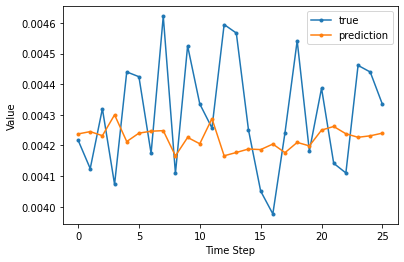

=================== LINK ============> reviews-v3-cc56b578-hvbrt
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 635684.2500 - mae: 779.4465 - mse: 635684.2500
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 580433.0625 - mae: 742.1924 - mse: 580433.0625
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 518038.9375 - mae: 698.3937 - mse: 518038.9375
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 445126.7188 - mae: 637.6988 - mse: 445126.7188
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 354697.3125 - mae: 564.2751 - mse: 354697.3125
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 267826.9688 - mae: 469.9600 - mse: 267826.9688
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 203190.6406 - mae: 361.2735 - mse: 203190.6406
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 170392.9375 - mae: 293.4175 - mse: 170392.9375
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


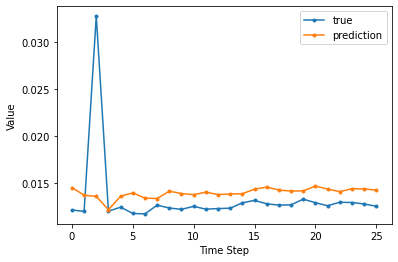

=================== LINK ============> kubernetes-dashboard-7f7d6bbd7f-2p5nh
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 429126.5312 - mae: 578.0025 - mse: 429126.5312
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 405800.9688 - mae: 560.2870 - mse: 405800.9688
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 386318.1562 - mae: 547.0248 - mse: 386318.1562
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 366044.1250 - mae: 529.7236 - mse: 366044.1250
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 344102.4688 - mae: 511.1648 - mse: 344102.4688
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 316287.1875 - mae: 486.3386 - mse: 316287.1875
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 283836.1250 - mae: 453.8516 - mse: 283836.1250
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 276423.2188 - mae: 441.0747 - mse: 276423.2188
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


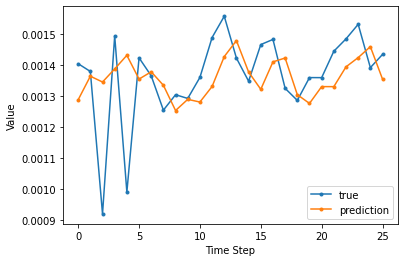

=================== LINK ============> reviews-v2-6cb6ccd848-7pkwg
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 547433.2500 - mae: 714.5208 - mse: 547433.2500
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 443334.5312 - mae: 639.7601 - mse: 443334.5312
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 338535.1250 - mae: 546.2320 - mse: 338535.1250
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 264778.9688 - mae: 427.1977 - mse: 264778.9688
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 219963.5781 - mae: 310.5859 - mse: 219963.5781
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 207293.2500 - mae: 279.8792 - mse: 207293.2500
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 212979.3281 - mae: 260.6539 - mse: 212979.3281
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 203217.7500 - mae: 255.9316 - mse: 203217.7500
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


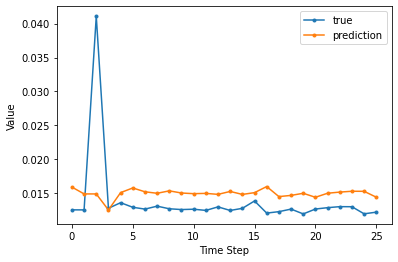

=================== LINK ============> optimization-algorithm-8595878648-j47fn
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 817130.7500 - mae: 897.3502 - mse: 817130.7500
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 743130.6250 - mae: 854.8854 - mse: 743130.6250
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 643918.5625 - mae: 793.2605 - mse: 643918.5625
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 493273.7812 - mae: 679.7000 - mse: 493273.7812
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 286233.2188 - mae: 488.3763 - mse: 286233.2188
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 185251.6562 - mae: 318.6495 - mse: 185251.6562
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 157599.6406 - mae: 216.0040 - mse: 157599.6406
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 154534.5781 - mae: 184.3932 - mse: 154534.5781
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


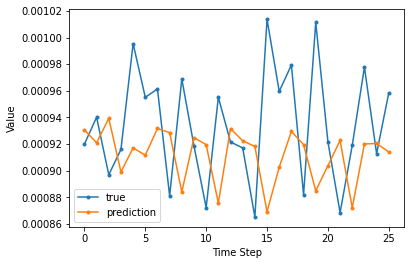

=================== LINK ============> omsagent-sq6c5
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 253389.1562 - mae: 425.9165 - mse: 253389.1562
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 251870.8906 - mae: 424.2281 - mse: 251870.8906
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 251077.1875 - mae: 423.1058 - mse: 251077.1875
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 248307.5000 - mae: 420.2628 - mse: 248307.5000
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 246954.0625 - mae: 419.0340 - mse: 246954.0625
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 245291.2500 - mae: 416.3500 - mse: 245291.2500
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 242686.6875 - mae: 413.2068 - mse: 242686.6875
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 242058.5625 - mae: 411.7871 - mse: 242058.5625
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


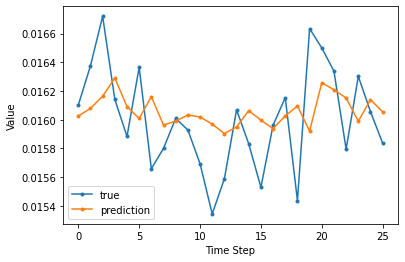

=================== LINK ============> prometheus-5db67458fb-f7vz9
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 860436.6250 - mae: 924.2437 - mse: 860436.6250
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 751834.0625 - mae: 860.4965 - mse: 751834.0625
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 603691.8750 - mae: 758.9769 - mse: 603691.8750
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 467838.0312 - mae: 639.6019 - mse: 467838.0312
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 363188.9375 - mae: 518.5377 - mse: 363188.9375
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 308813.9062 - mae: 426.3786 - mse: 308813.9062
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 290334.6562 - mae: 350.5410 - mse: 290334.6562
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 283393.9375 - mae: 331.4462 - mse: 283393.9375
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


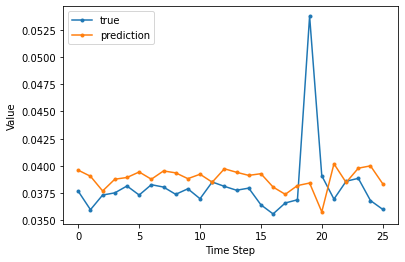

=================== LINK ============> kiali-6f457f5964-gd4mh
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 403597.1875 - mae: 558.0058 - mse: 403597.1875
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 403348.3125 - mae: 557.8427 - mse: 403348.3125
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 403752.3750 - mae: 558.0882 - mse: 403752.3750
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 403400.9688 - mae: 557.7877 - mse: 403400.9688
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 403405.0312 - mae: 557.8219 - mse: 403405.0312
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 403414.5312 - mae: 557.9109 - mse: 403414.5312
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 403361.1562 - mae: 557.8440 - mse: 403361.1562
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 403346.3750 - mae: 557.8265 - mse: 403346.3750
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


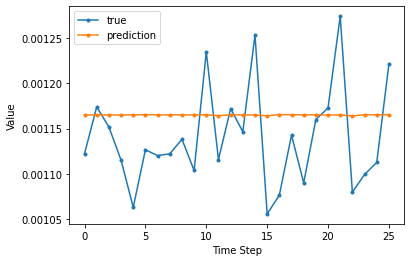

=================== LINK ============> istio-egressgateway-6d98c888ff-mtj8p
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 291713.2812 - mae: 449.0359 - mse: 291713.2812
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 289884.7500 - mae: 447.0900 - mse: 289884.7500
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 288346.8750 - mae: 445.7968 - mse: 288346.8750
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 287934.9375 - mae: 445.5411 - mse: 287934.9375
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 290593.4688 - mae: 447.1187 - mse: 290593.4688
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 288774.4375 - mae: 446.2890 - mse: 288774.4375
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 286486.4375 - mae: 444.0897 - mse: 286486.4375
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 286085.5625 - mae: 442.2010 - mse: 286085.5625
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


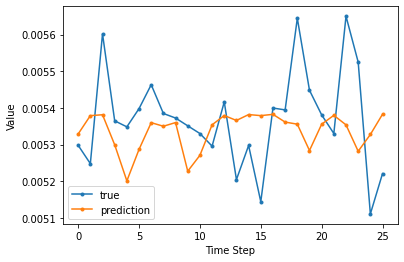

=================== LINK ============> productpage-v1-64794f5db4-wpjm9
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 269144.9062 - mae: 456.9492 - mse: 269144.9062
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 222854.7656 - mae: 391.8091 - mse: 222854.7656
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 184748.2344 - mae: 342.9520 - mse: 184748.2344
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 173714.0156 - mae: 306.9170 - mse: 173714.0156
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 168301.5625 - mae: 295.1539 - mse: 168301.5625
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 171139.0156 - mae: 295.2339 - mse: 171139.0156
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 169827.7344 - mae: 297.0646 - mse: 169827.7344
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 169275.8125 - mae: 295.5876 - mse: 169275.8125
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


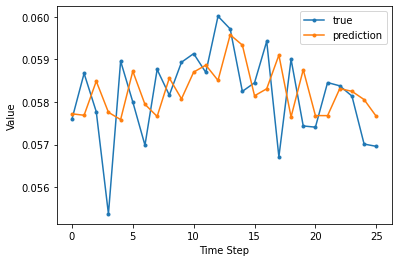

=================== LINK ============> coredns-869cb84759-md9p9
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 265084.1250 - mae: 410.6012 - mse: 265084.1250
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 264284.7500 - mae: 409.4683 - mse: 264284.7500
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 263124.3125 - mae: 408.0781 - mse: 263124.3125
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 262644.9688 - mae: 407.2059 - mse: 262644.9688
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 261734.4375 - mae: 406.0009 - mse: 261734.4375
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 261427.0938 - mae: 405.1854 - mse: 261427.0938
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 260666.6875 - mae: 404.2067 - mse: 260666.6875
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 260494.8906 - mae: 403.3277 - mse: 260494.8906
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


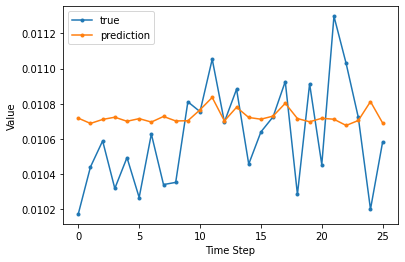

=================== LINK ============> load-prediction-59d498f88f-pncd6
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 531063.4375 - mae: 710.2014 - mse: 531063.4375
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 441911.5312 - mae: 639.7039 - mse: 441911.5312
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 331470.5625 - mae: 539.7516 - mse: 331470.5625
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 236544.2188 - mae: 414.7258 - mse: 236544.2188
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 178591.2656 - mae: 299.7135 - mse: 178591.2656
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 164440.8125 - mae: 226.3169 - mse: 164440.8125
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 159037.9375 - mae: 211.9950 - mse: 159037.9375
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 150851.1094 - mae: 215.9976 - mse: 150851.1094
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


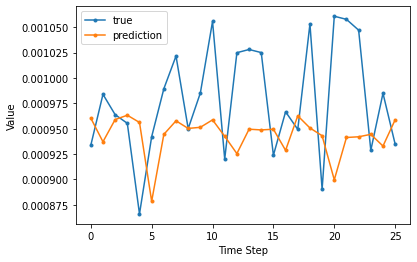

=================== LINK ============> ratings-v1-c6cdf8d98-rvfjs
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 137917.9531 - mae: 288.0262 - mse: 137917.9531
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 136832.0625 - mae: 286.5096 - mse: 136832.0625
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 136831.6250 - mae: 288.6588 - mse: 136831.6250
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 136541.0781 - mae: 288.6548 - mse: 136541.0781
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 136250.1406 - mae: 288.5864 - mse: 136250.1406
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 136239.4844 - mae: 288.7274 - mse: 136239.4844
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 136087.9062 - mae: 287.9414 - mse: 136087.9062
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 136070.3125 - mae: 288.7437 - mse: 136070.3125
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


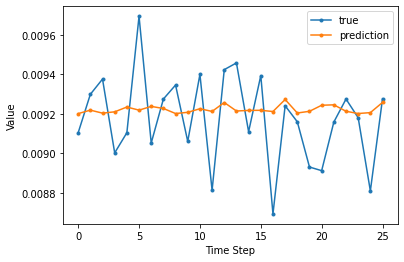

=================== LINK ============> grafana-5dc4b4676c-pbqxc
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 326033.1562 - mae: 506.6395 - mse: 326033.1562
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 301602.7188 - mae: 475.3074 - mse: 301602.7188
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 285166.7812 - mae: 455.6167 - mse: 285166.7812
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 273777.1875 - mae: 442.5275 - mse: 273777.1875
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 269232.8750 - mae: 441.9013 - mse: 269232.8750
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 256057.8906 - mae: 423.5829 - mse: 256057.8906
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 258331.4844 - mae: 424.5169 - mse: 258331.4844
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 255089.9375 - mae: 420.4937 - mse: 255089.9375
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


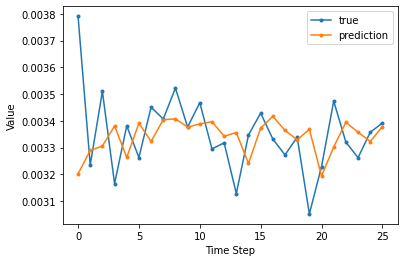

=================== LINK ============> details-v1-5974b67c8-s6r85
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 294684.5000 - mae: 484.1457 - mse: 294684.5000
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 262858.7500 - mae: 448.6925 - mse: 262858.7500
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 233581.1406 - mae: 408.9232 - mse: 233581.1406
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 210994.8438 - mae: 378.8824 - mse: 210994.8438
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 196795.1094 - mae: 363.3074 - mse: 196795.1094
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 194316.0000 - mae: 360.4658 - mse: 194316.0000
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 190260.0156 - mae: 360.0723 - mse: 190260.0156
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 190576.5625 - mae: 360.2671 - mse: 190576.5625
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


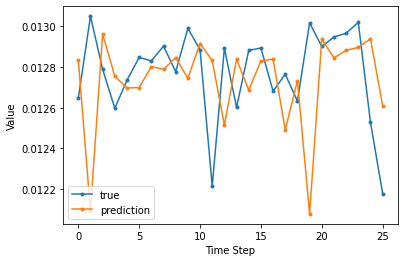

=================== LINK ============> dashboard-metrics-scraper-566c858889-2zfxs
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 236445.0625 - mae: 386.8576 - mse: 236445.0625
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 231293.0625 - mae: 382.7260 - mse: 231293.0625
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 227503.4375 - mae: 381.0783 - mse: 227503.4375
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 223671.4844 - mae: 377.6909 - mse: 223671.4844
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 220661.5156 - mae: 376.1492 - mse: 220661.5156
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 217473.5156 - mae: 376.8116 - mse: 217473.5156
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 213534.9688 - mae: 373.7283 - mse: 213534.9688
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 215191.8281 - mae: 376.4756 - mse: 215191.8281
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


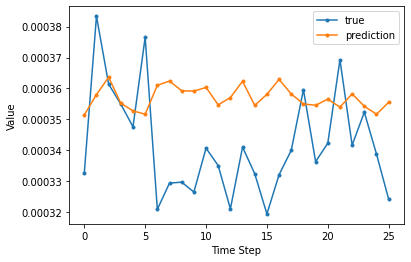

=================== LINK ============> omsagent-6jb4v
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 144291.8125 - mae: 278.6052 - mse: 144291.8125
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 143732.9062 - mae: 277.6863 - mse: 143732.9062
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 143711.7031 - mae: 277.5175 - mse: 143711.7031
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 143768.2500 - mae: 278.3432 - mse: 143768.2500
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 143392.7344 - mae: 277.1014 - mse: 143392.7344
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 143409.4062 - mae: 276.8256 - mse: 143409.4062
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 143082.4375 - mae: 276.4677 - mse: 143082.4375
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 143111.0000 - mae: 276.5695 - mse: 143111.0000
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


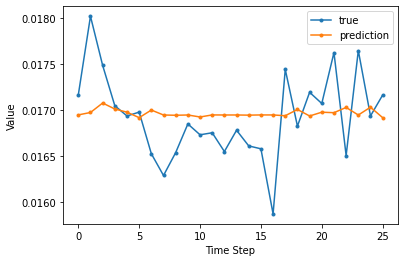

=================== LINK ============> istio-ingressgateway-6bff4c6896-ckg8h
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 248539.1719 - mae: 419.8868 - mse: 248539.1719
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 238450.4844 - mae: 412.0207 - mse: 238450.4844
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 231087.7812 - mae: 404.8132 - mse: 231087.7812
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 223625.7500 - mae: 396.6275 - mse: 223625.7500
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 217010.2344 - mae: 388.8659 - mse: 217010.2344
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 216078.5312 - mae: 387.0601 - mse: 216078.5312
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 195693.4375 - mae: 364.7280 - mse: 195693.4375
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 196562.9219 - mae: 362.5352 - mse: 196562.9219
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


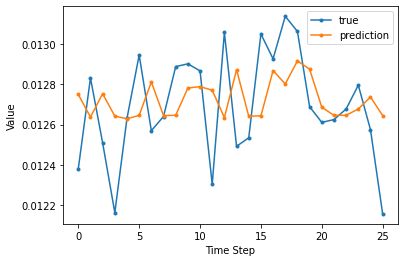

=================== LINK ============> ingress-nginx-controller-5947756d78-fl295
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 219963.4375 - mae: 391.2628 - mse: 219963.4375
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 217205.3281 - mae: 389.7882 - mse: 217205.3281
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 217224.5312 - mae: 391.4486 - mse: 217224.5312
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 215020.1719 - mae: 389.7075 - mse: 215020.1719
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 214012.1094 - mae: 388.9643 - mse: 214012.1094
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 214061.4844 - mae: 389.9068 - mse: 214061.4844
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 213011.1562 - mae: 389.6750 - mse: 213011.1562
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 213107.6562 - mae: 389.9211 - mse: 213107.6562
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


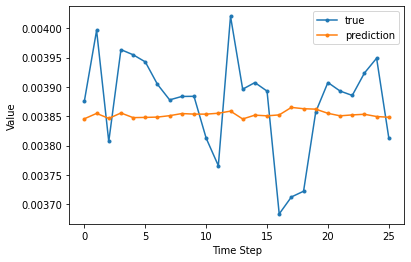

=================== LINK ============> reviews-v1-7f6558b974-8r46j
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 964407.9375 - mae: 979.1150 - mse: 964407.9375
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 739892.8750 - mae: 856.9907 - mse: 739892.8750
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 543124.0625 - mae: 728.3541 - mse: 543124.0625
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 289313.6250 - mae: 470.5029 - mse: 289313.6250
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 174686.8125 - mae: 267.9044 - mse: 174686.8125
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 153237.7500 - mae: 201.2828 - mse: 153237.7500
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 152402.2188 - mae: 165.0168 - mse: 152402.2188
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 146931.3906 - mae: 165.3439 - mse: 146931.3906
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


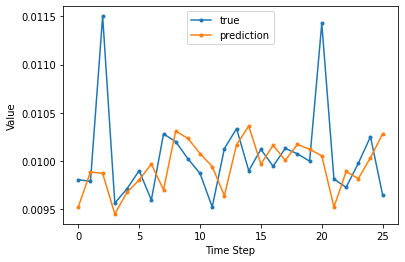

=================== LINK ============> metrics-server-5f4c878d8-lxljm
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 230312.8438 - mae: 401.1323 - mse: 230312.8438
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 225468.3438 - mae: 393.2361 - mse: 225468.3438
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 221897.4688 - mae: 385.6039 - mse: 221897.4688
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 219123.8281 - mae: 381.7473 - mse: 219123.8281
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 217858.1094 - mae: 383.1792 - mse: 217858.1094
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 213581.6562 - mae: 378.7938 - mse: 213581.6562
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 211722.4688 - mae: 377.5283 - mse: 211722.4688
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 212906.5781 - mae: 377.9167 - mse: 212906.5781
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


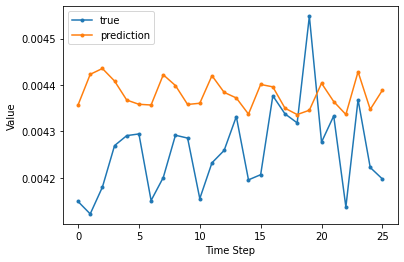

=================== LINK ============> tunnelfront-857f5c9f68-rwpfk
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 253536.7500 - mae: 400.8646 - mse: 253536.7500
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 245946.3438 - mae: 393.3894 - mse: 245946.3438
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 236186.1875 - mae: 383.4714 - mse: 236186.1875
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 229256.5312 - mae: 376.2739 - mse: 229256.5312
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 220388.0781 - mae: 367.4100 - mse: 220388.0781
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 216904.2656 - mae: 362.8742 - mse: 216904.2656
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 213589.6719 - mae: 359.0972 - mse: 213589.6719
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 215041.7344 - mae: 361.4161 - mse: 215041.7344
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


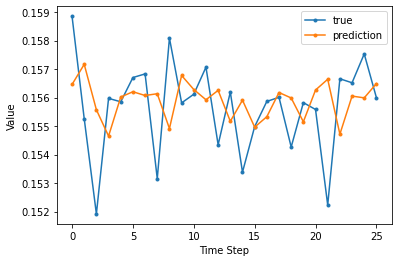

=================== LINK ============> omsagent-gbb6z
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 201505.7656 - mae: 332.8750 - mse: 201505.7656
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 187488.8125 - mae: 320.7752 - mse: 187488.8125
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 183762.6719 - mae: 317.0917 - mse: 183762.6719
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 181232.2656 - mae: 317.2568 - mse: 181232.2656
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 178111.2656 - mae: 315.6652 - mse: 178111.2656
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 175337.0000 - mae: 313.1689 - mse: 175337.0000
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 178391.5938 - mae: 316.7455 - mse: 178391.5938
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 171768.4375 - mae: 312.3992 - mse: 171768.4375
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


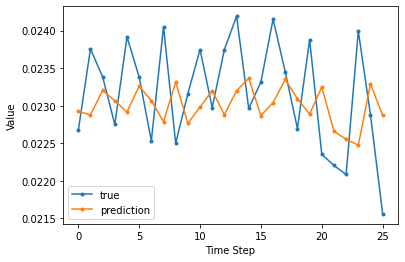

=================== LINK ============> coredns-869cb84759-qvxlc
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 253508.5938 - mae: 396.8587 - mse: 253508.5938
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 248620.2656 - mae: 394.2836 - mse: 248620.2656
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 246727.3125 - mae: 393.3449 - mse: 246727.3125
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 244710.5156 - mae: 394.0610 - mse: 244710.5156
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 243709.7500 - mae: 396.3641 - mse: 243709.7500
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 242789.8125 - mae: 396.7012 - mse: 242789.8125
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 242448.6094 - mae: 397.6472 - mse: 242448.6094
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 242212.8594 - mae: 397.8083 - mse: 242212.8594
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


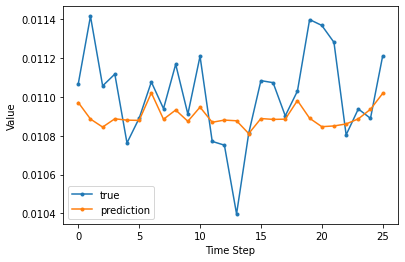

=================== LINK ============> kube-proxy-kq4c6
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 359992.3438 - mae: 507.0566 - mse: 359992.3438
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 350742.9375 - mae: 494.6988 - mse: 350742.9375
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 334604.0625 - mae: 479.0081 - mse: 334604.0625
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 311814.5938 - mae: 452.3764 - mse: 311814.5938
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 305443.7188 - mae: 448.7020 - mse: 305443.7188
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 301918.1562 - mae: 445.7429 - mse: 301918.1562
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 300632.0938 - mae: 444.8618 - mse: 300632.0938
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 299181.5312 - mae: 441.8371 - mse: 299181.5312
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


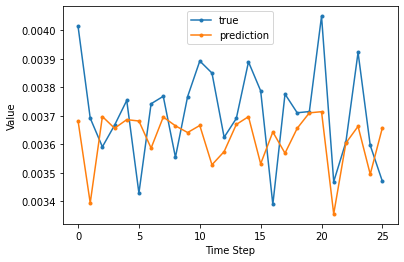

=================== LINK ============> k8-server-5654d89694-grp4t
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: nan - mae: nan - mse: nan                  
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
(26

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


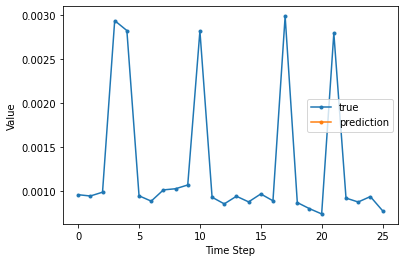

=================== LINK ============> istio-tracing-8584b4d7f9-bdhz5
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 2ms/step - loss: 910948.3750 - mae: 948.3985 - mse: 910948.3750
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 629913.8750 - mae: 782.6829 - mse: 629913.8750
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 443022.5625 - mae: 625.3816 - mse: 443022.5625
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 326118.1562 - mae: 465.1006 - mse: 326118.1562
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 293341.4375 - mae: 364.2685 - mse: 293341.4375
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 284714.3750 - mae: 318.2172 - mse: 284714.3750
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 281401.2188 - mae: 300.6256 - mse: 281401.2188
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 284005.2812 - mae: 334.5334 - mse: 284005.2812
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


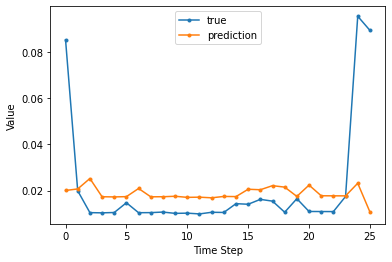

=================== LINK ============> coredns-autoscaler-5b867494f-qchnt
Epoch 1/100


/tmp/ipykernel_27804/3280232144.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1,callbacks=[early_stopping_callback])


26/26 [==============================] - 1s 1ms/step - loss: 242750.3281 - mae: 389.1302 - mse: 242750.3281
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 242276.8438 - mae: 388.4586 - mse: 242276.8438
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 243142.6094 - mae: 389.0112 - mse: 243142.6094
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 242424.2500 - mae: 388.6357 - mse: 242424.2500
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 242281.7500 - mae: 388.5886 - mse: 242281.7500
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 242376.5000 - mae: 388.8387 - mse: 242376.5000
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 243321.4688 - mae: 389.3776 - mse: 243321.4688
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 242341.4375 - mae: 388.3070 - mse: 242341.4375
Epoch 9/100
26/26 [==============================] -

/tmp/ipykernel_27804/3280232144.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


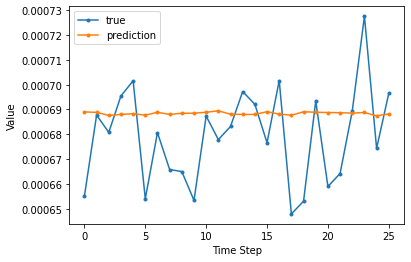

In [26]:
cal_weights(0.5,1,1,100,dataset,6)

In [27]:
print(dataset.columns)

Index(['kube-proxy-fq5mr', 'istiod-587bbdc654-kxkq9',
       'omsagent-rs-7546994bcb-wgxnv', 'kube-proxy-6k99q',
       'reviews-v3-cc56b578-hvbrt', 'kubernetes-dashboard-7f7d6bbd7f-2p5nh',
       'reviews-v2-6cb6ccd848-7pkwg',
       'optimization-algorithm-8595878648-j47fn', 'omsagent-sq6c5',
       'prometheus-5db67458fb-f7vz9', 'kiali-6f457f5964-gd4mh',
       'istio-egressgateway-6d98c888ff-mtj8p',
       'productpage-v1-64794f5db4-wpjm9', 'coredns-869cb84759-md9p9',
       'load-prediction-59d498f88f-pncd6', 'ratings-v1-c6cdf8d98-rvfjs',
       'grafana-5dc4b4676c-pbqxc', 'details-v1-5974b67c8-s6r85',
       'dashboard-metrics-scraper-566c858889-2zfxs', 'omsagent-6jb4v',
       'istio-ingressgateway-6bff4c6896-ckg8h',
       'ingress-nginx-controller-5947756d78-fl295',
       'reviews-v1-7f6558b974-8r46j', 'metrics-server-5f4c878d8-lxljm',
       'tunnelfront-857f5c9f68-rwpfk', 'omsagent-gbb6z',
       'coredns-869cb84759-qvxlc', 'kube-proxy-kq4c6',
       'k8-server-5654d89694-g

In [28]:
link_prediction_list

[{'predictions': array([0.11517951, 0.20163873, 0.268877  , 0.32127628, 0.36215189,
         0.39370748])},
 {'predictions': array([0.55416968, 0.5224576 , 0.52814083, 0.52867506, 0.52862762,
         0.52863236])},
 {'predictions': array([0.39123867, 0.50755061, 0.56078296, 0.48133433, 0.58640907,
         0.47505116])},
 {'predictions': array([0.31423872, 0.42660425, 0.33763035, 0.43043722, 0.32625073,
         0.4290479 ])},
 {'predictions': array([0.09043069, 0.1560151 , 0.21123923, 0.25774283, 0.29691077,
         0.32991505])},
 {'predictions': array([0.73496696, 0.67833376, 0.63588682, 0.60419712, 0.58083687,
         0.56401038])},
 {'predictions': array([0.09637152, 0.16617913, 0.22408319, 0.2721302 , 0.31203422,
         0.34523999])},
 {'predictions': array([0.02708102, 0.05178704, 0.07515325, 0.09725237, 0.11815304,
         0.13792043])},
 {'predictions': array([0.42237101, 0.50210072, 0.51649287, 0.51694047, 0.51729454,
         0.51759633])},
 {'predictions': array([0.13

In [29]:
error_dict = {'MAPE':mape_prediction_error,'RMSE':rmse_prediction_error,"SMAPE":smape_prediction_error}
prediction_df = pd.DataFrame(link_prediction_list,index=dataset.columns)
error_df = pd.DataFrame(error_dict,index=dataset.columns)

In [30]:
prediction_df

,predictions
kube-proxy-fq5mr,"[0.11517950627120928, 0.20163873478683428, 0.2..."
istiod-587bbdc654-kxkq9,"[0.5541696805701428, 0.5224575986609632, 0.528..."
omsagent-rs-7546994bcb-wgxnv,"[0.3912386653223218, 0.507550608376521, 0.5607..."
kube-proxy-6k99q,"[0.3142387217462517, 0.4266042460382439, 0.337..."
reviews-v3-cc56b578-hvbrt,"[0.09043069322152905, 0.1560151048426228, 0.21..."
kubernetes-dashboard-7f7d6bbd7f-2p5nh,"[0.7349669586906044, 0.6783337647208778, 0.635..."
reviews-v2-6cb6ccd848-7pkwg,"[0.09637151772532446, 0.16617913491282446, 0.2..."
optimization-algorithm-8595878648-j47fn,"[0.02708101581622975, 0.051787039986151626, 0...."
omsagent-sq6c5,"[0.42237101098856544, 0.5021007244285068, 0.51..."
prometheus-5db67458fb-f7vz9,"[0.13510110978242995, 0.2143808339035237, 0.27..."


In [31]:
error_df

,MAPE,RMSE,SMAPE
kube-proxy-fq5mr,2.848714,0.000137,2.880308
istiod-587bbdc654-kxkq9,2.755014,0.000205,2.729054
omsagent-rs-7546994bcb-wgxnv,1.753530,0.000419,1.766513
kube-proxy-6k99q,3.874281,0.000205,3.943292
reviews-v3-cc56b578-hvbrt,13.655125,0.004061,13.887195
kubernetes-dashboard-7f7d6bbd7f-2p5nh,8.353000,0.000146,7.827702
reviews-v2-6cb6ccd848-7pkwg,20.040157,0.005657,19.575399
optimization-algorithm-8595878648-j47fn,4.937670,0.000058,5.056451
omsagent-sq6c5,1.777792,0.000344,1.772269
prometheus-5db67458fb-f7vz9,5.419852,0.003560,5.503231
